In [6]:
import torch 
from medical_dataset import MedicalDataset
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from unet import UNet
import torchvision.transforms as transforms


device = "cuda" if torch.cuda.is_available() else "cpu"


In [16]:

cust_transforms = [
    transforms.Resize((256,256)),
    transforms.RandomAffine(10),
]

In [17]:
D_test1 = MedicalDataset(1, "data_test",cust_transforms)

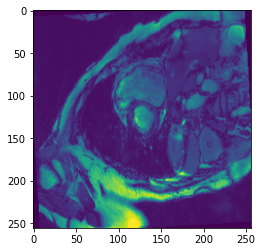

In [18]:
plt.imshow(D_test1[0][0][0])

In [19]:

def evaluate_rec(model_parse, transform):
    model = UNet(1,1)
    model.to(device)
    for i in range(1,4):
        D_val = MedicalDataset(i, "data_validation", transform)
        val_loader = torch.utils.data.DataLoader(
            D_val, batch_size=5, shuffle=False
        )
        model.load_state_dict(torch.load(model_parse.format(i)))
        model.eval()
        print(evaluate(model, val_loader, True).item())
        
evaluate_rec('models/unet{}_CE.pt', cust_transforms)

NameError: name 'evaluate' is not defined